In [1]:
# netowrks
import networkx as nx
import igraph as ig

# data processing
import pandas as pd
import numpy as np

#some functions to make our lifes easier
import sys
sys.path.append("./")
from common_functions import *

# viz
import pylab as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Change the default options of visualization (improving the defaults)
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "axes.spines.bottom":
False,"lines.linewidth": 2, "grid.color": "lightgray", "legend.frameon": False, "xtick.labelcolor": "#484848", "ytick.labelcolor":
"#484848", "xtick.color": "#484848", "ytick.color": "#484848","text.color": "#484848", "axes.labelcolor": "#484848",
"axes.titlecolor":"#484848","figure.figsize": [5,3],
"axes.titlelocation":"left","xaxis.labellocation":"left","yaxis.labellocation":"bottom"}
palette = ["#3d348b","#e6af2e","#191716","#e0e2db"] #use your favourite colours
sns.set_theme(context='paper', style='white', palette=palette, font='Verdana', font_scale=1.3, color_codes=True,
rc=custom_params)

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
path_data = "../Data/"

# Exercise 1: Reading and visualizing graphs

Goal: Get used to the `networkx` library

## 1.1. Basic plot
- Read and understand the following code

In [3]:
# Read an example data on florentine marriage families in the XV century
G = nx.florentine_families_graph()

# Show the nodes and edges
print("Nodes: ", G.nodes())
print("Edges: ", G.edges())


Nodes:  ['Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi']
Edges:  [('Acciaiuoli', 'Medici'), ('Medici', 'Barbadori'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Medici', 'Albizzi'), ('Medici', 'Salviati'), ('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi'), ('Peruzzi', 'Bischeri'), ('Strozzi', 'Ridolfi'), ('Strozzi', 'Bischeri'), ('Ridolfi', 'Tornabuoni'), ('Tornabuoni', 'Guadagni'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'), ('Salviati', 'Pazzi'), ('Bischeri', 'Guadagni'), ('Guadagni', 'Lamberteschi')]


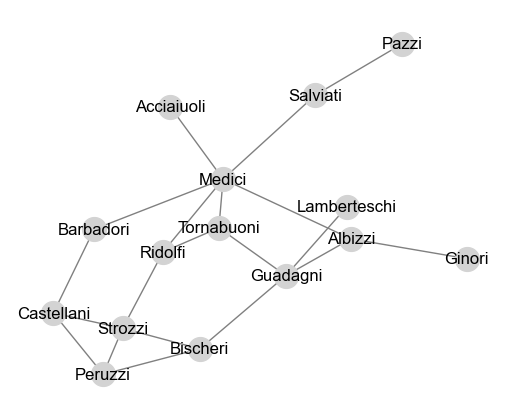

In [4]:
# Visualize it
plt.figure(figsize=(5,4)) #set up dimensions

# create layout (once so we can reuse it if needed)
pos = nx.spring_layout(G, seed = 1)
nx.draw(G, pos = pos, with_labels = True, 
        edge_color = "gray", node_color = "lightgray")

## 1.2. Read and visualize your network
Network here: https://tinyurl.com/network-game
(I added the direct CSV link. But you could also download it as a CSV file and move it to the folder of this notebook) 

Use the nx.from_pandas_edgelistfunction (you need to set up the `source` and `target` parameters)
Print number of nodes and edges

In [5]:
# Read edgelist (link)
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSuZC86KjXYKSPr0Nw7mfRha4zwea3aMw-gTKliVcbRt_m3NRiCEyxbH_d5M8MBL0LWayg1WDmnqBET/pub?gid=0&single=true&output=csv")
# Convert to networkx
G = nx.from_pandas_edgelist(df, source="P1", target="P2")
print(len(G.nodes()))
print(len(G.edges()))

27
29


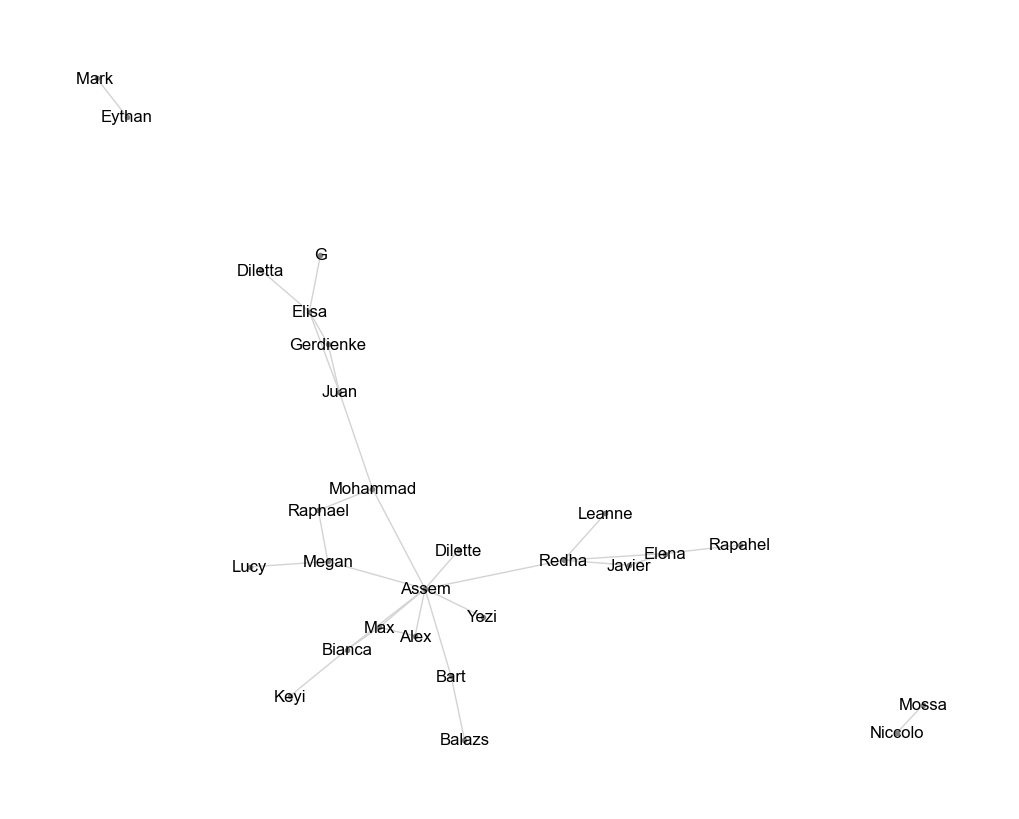

In [6]:
# create figure and plot
plt.figure(figsize=(10,8))

# create layout (once so we can reuse it if needed)
pos = nx.spring_layout(G, seed = 1)
nx.draw(G, pos = pos, with_labels = True, node_size=10,
        edge_color = "lightgray", node_color = "gray")

## 1.3. Read and visualize the Twitter network

We will be using (parts of) this network in the following days.

It contains mentions, replies and quotes of user A to user B (but let's treat is as undirected)
```
replied_to    40255
mentioned     10407
quoted         3448
```

Use the nx.from_pandas_edgelist function
Print number of nodes and edges

In [7]:
# Read edgelist
df = pd.read_csv(f"{path_data}/ic2s2_netsci_3.tsv", sep="\t")

# Convert to networkx
G = nx.from_pandas_edgelist(df)
G.remove_edges_from(nx.selfloop_edges(G)) #remove self-edges
print(len(G.nodes()))
print(len(G.edges()))

1554
30412


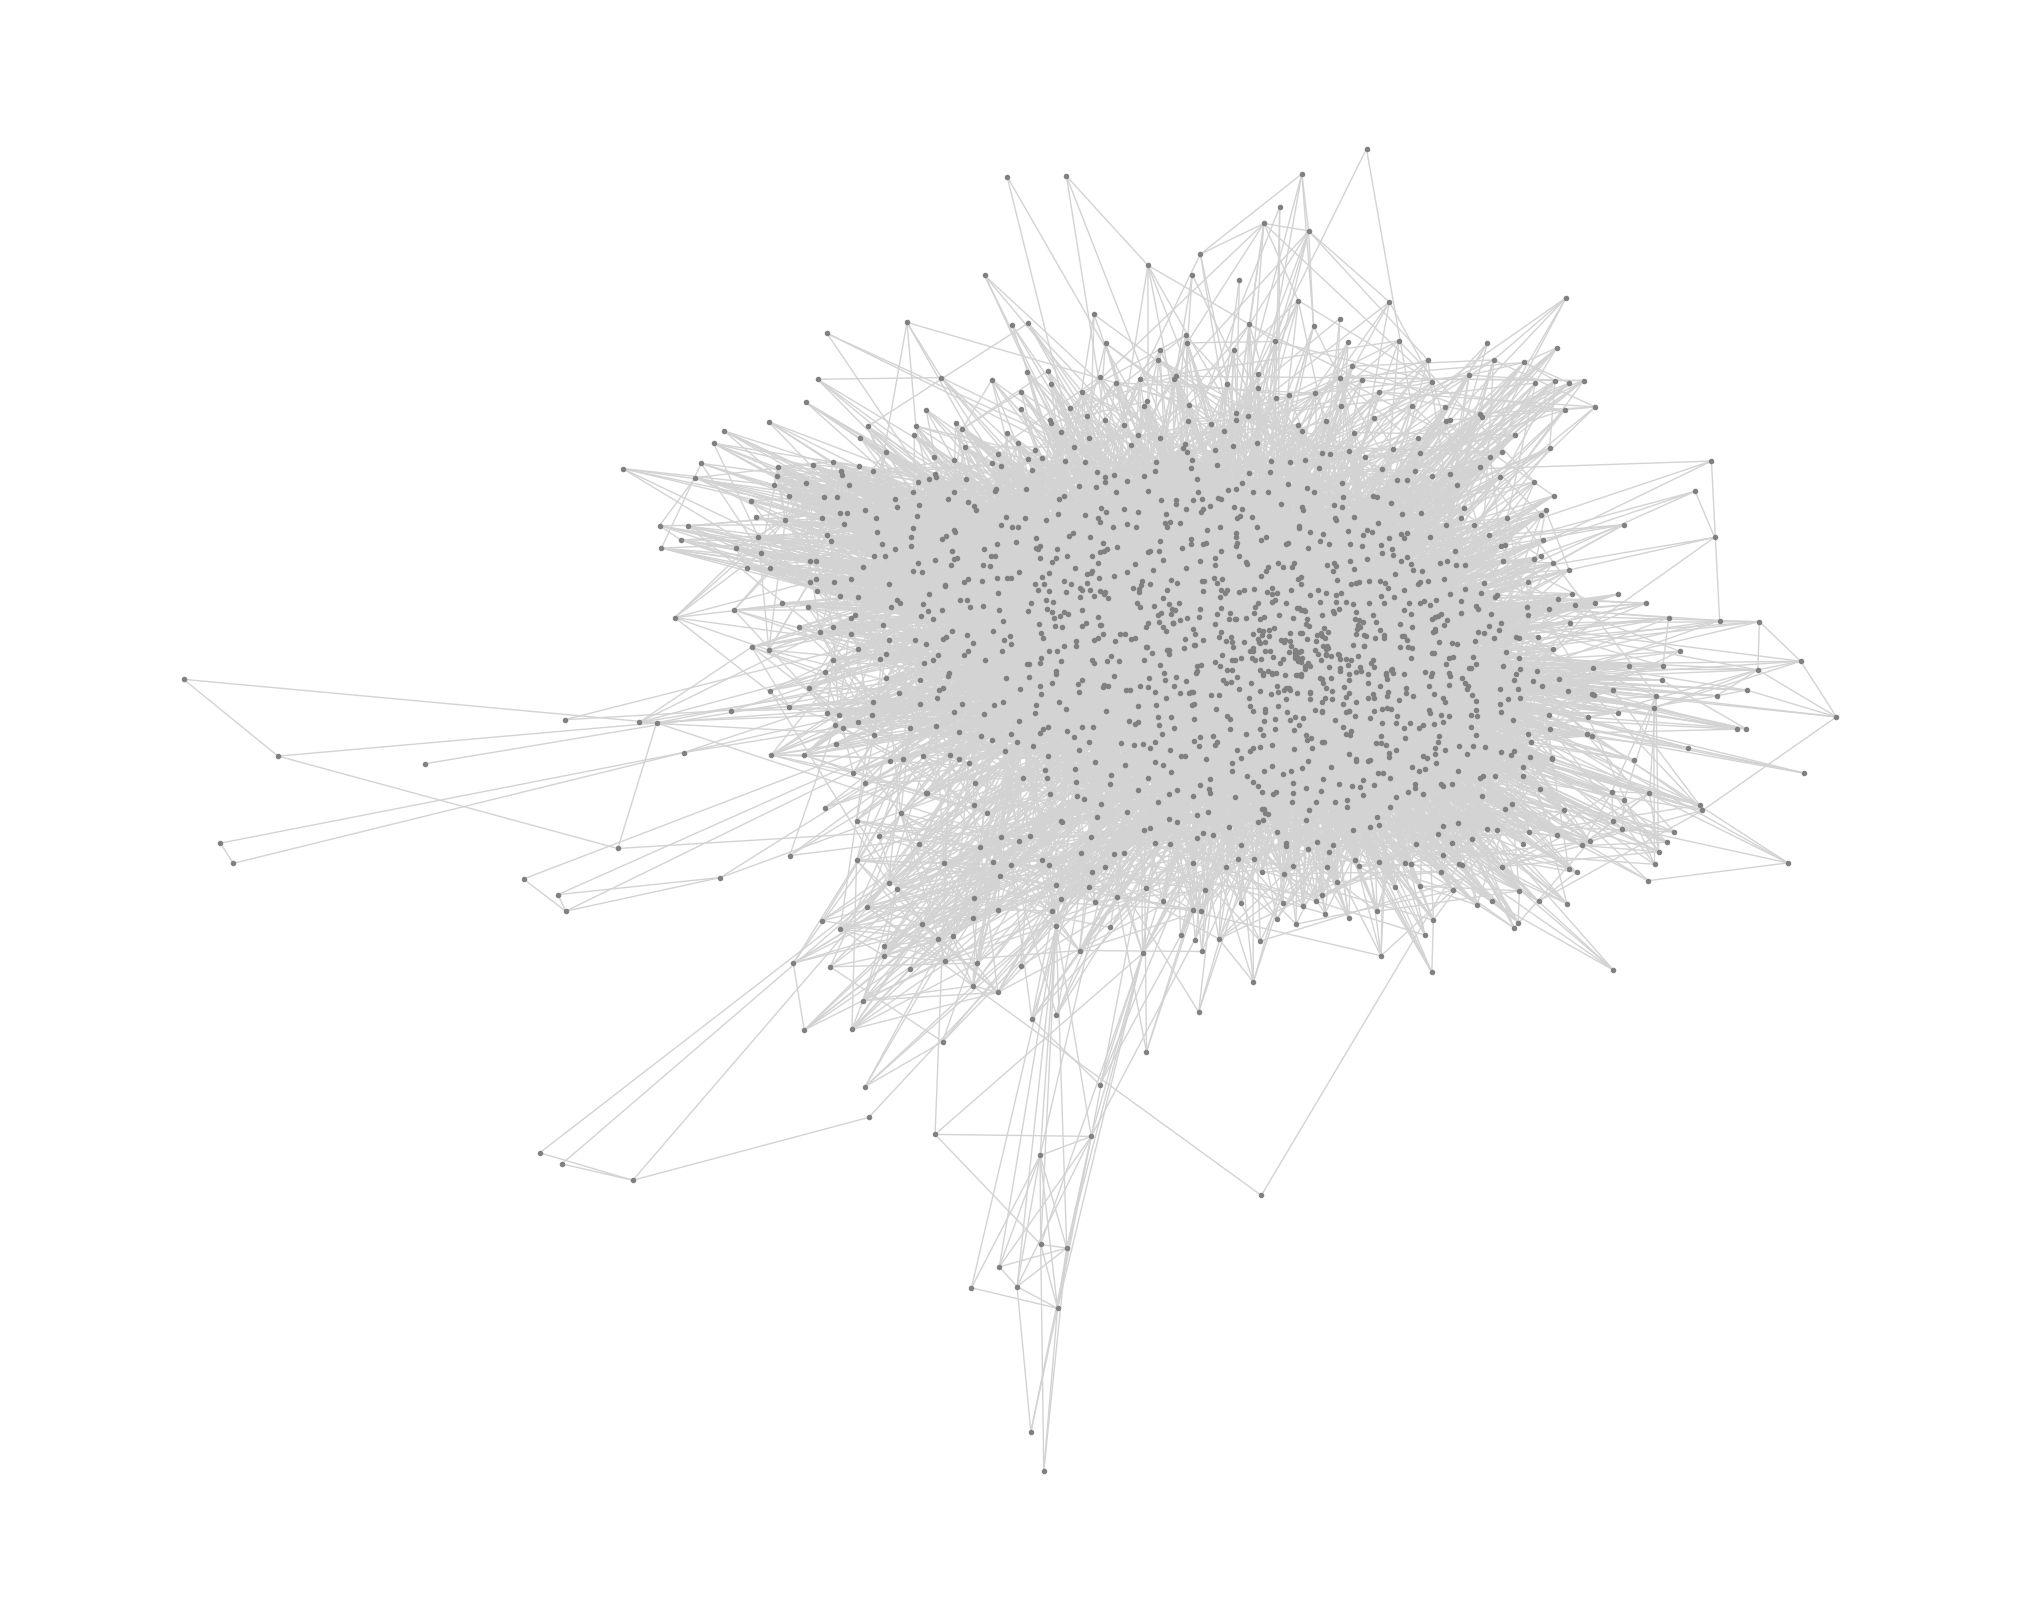

In [8]:
# create figure and plot
plt.figure(figsize=(20,16))

# create layout (once so we can reuse it if needed)
pos = nx.spring_layout(G, seed = 1)
nx.draw(G, pos = pos, with_labels = False, node_size=10,
        edge_color = "lightgray", node_color = "gray")

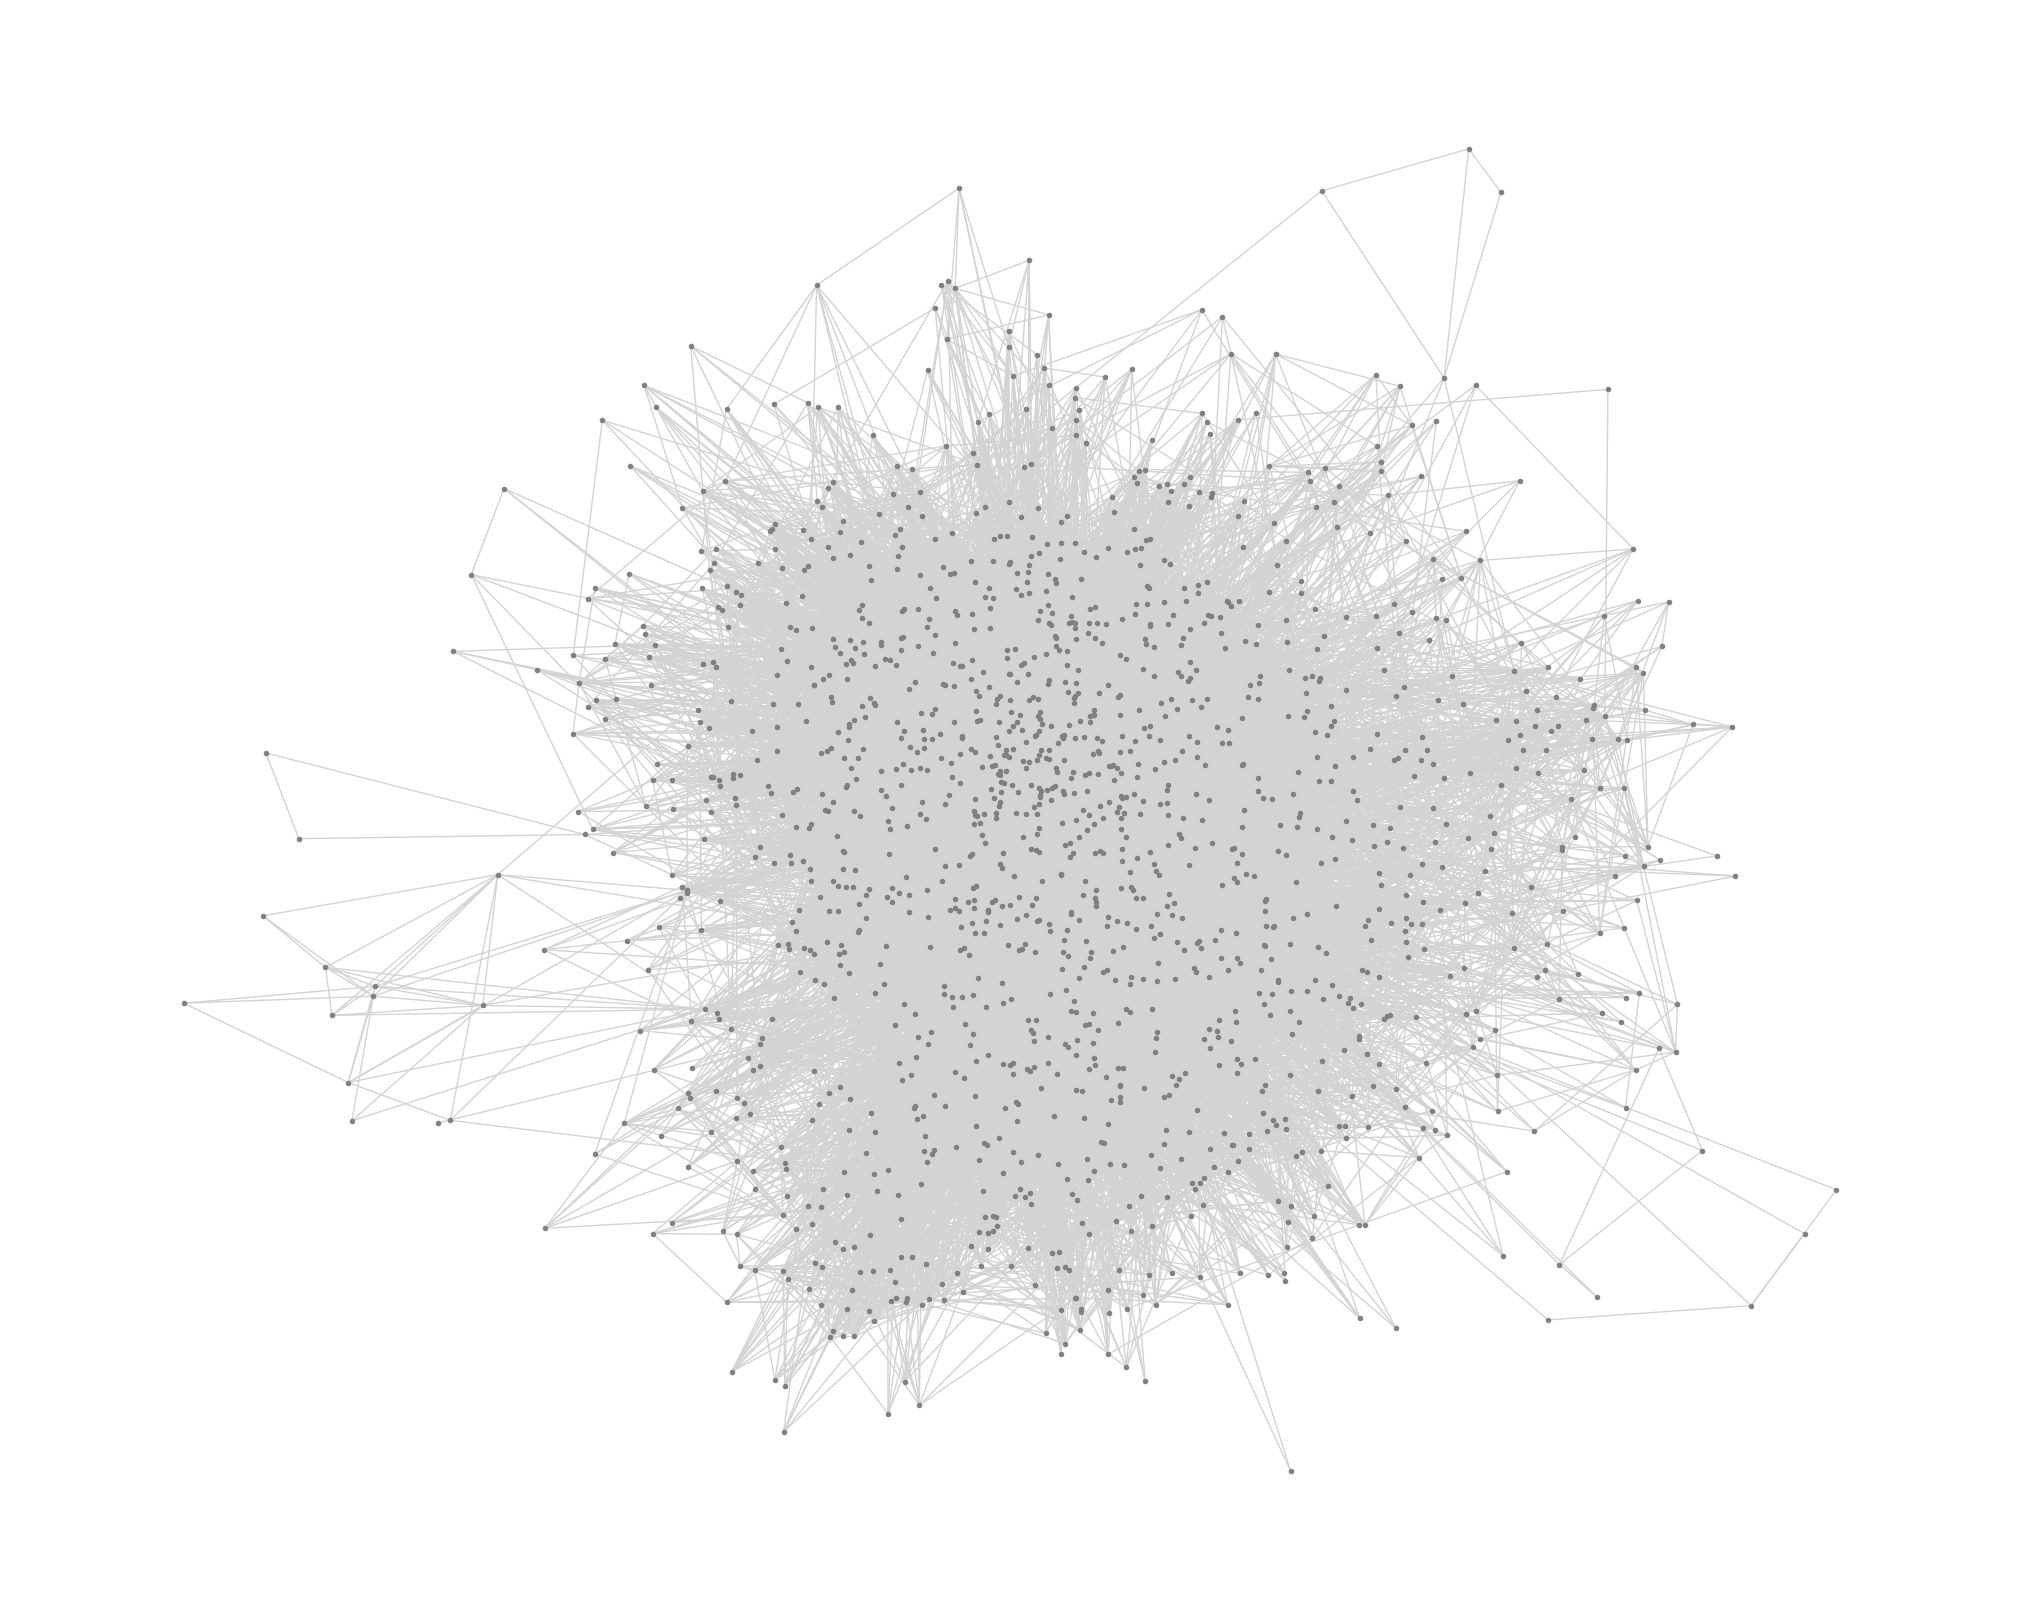

In [9]:
# igraph is faster. Here is how to convert to igraph
h = ig.Graph().from_networkx(G)
# create layout
layout = h.layout_fruchterman_reingold()
# create positions in the networx format (as a dictionary)
pos = dict(zip(G.nodes(), layout.coords))

# Plot as before
plt.figure(figsize=(20, 16))
nx.draw(G, pos = pos, with_labels = False, node_size=10,
        edge_color = "lightgray", node_color = "gray")

## 1.4. Read and visualize a large(r) network 
- Read network in f"{path_data}/wiki-Vote.txt". Careful, it is a directed network, you need to use the create_using parameter.

(use iterations = 30 in the spring_layout)


Format of the file:
```
# Directed graph (each unordered pair of nodes is saved once): Wiki-Vote.txt 
# Wikipedia voting on promotion to administratorship (till January 2008). Directed edge A->B means user A voted on B becoming Wikipedia administrator.
# Nodes: 7115 Edges: 103689
# FromNodeId	ToNodeId
30	1412
30	3352
```

In [10]:
# Read directed graph
G_wiki = nx.read_edgelist(f"{path_data}/wiki-Vote.txt", create_using=nx.DiGraph())
print(len(G_wiki.nodes()))
print(len(G_wiki.edges()))

7115
103689


In [11]:
# Create layout (this will take a couple minutes). Networkx is a particularly slow library
pos = nx.spring_layout(G_wiki, seed = 1, iterations=30)

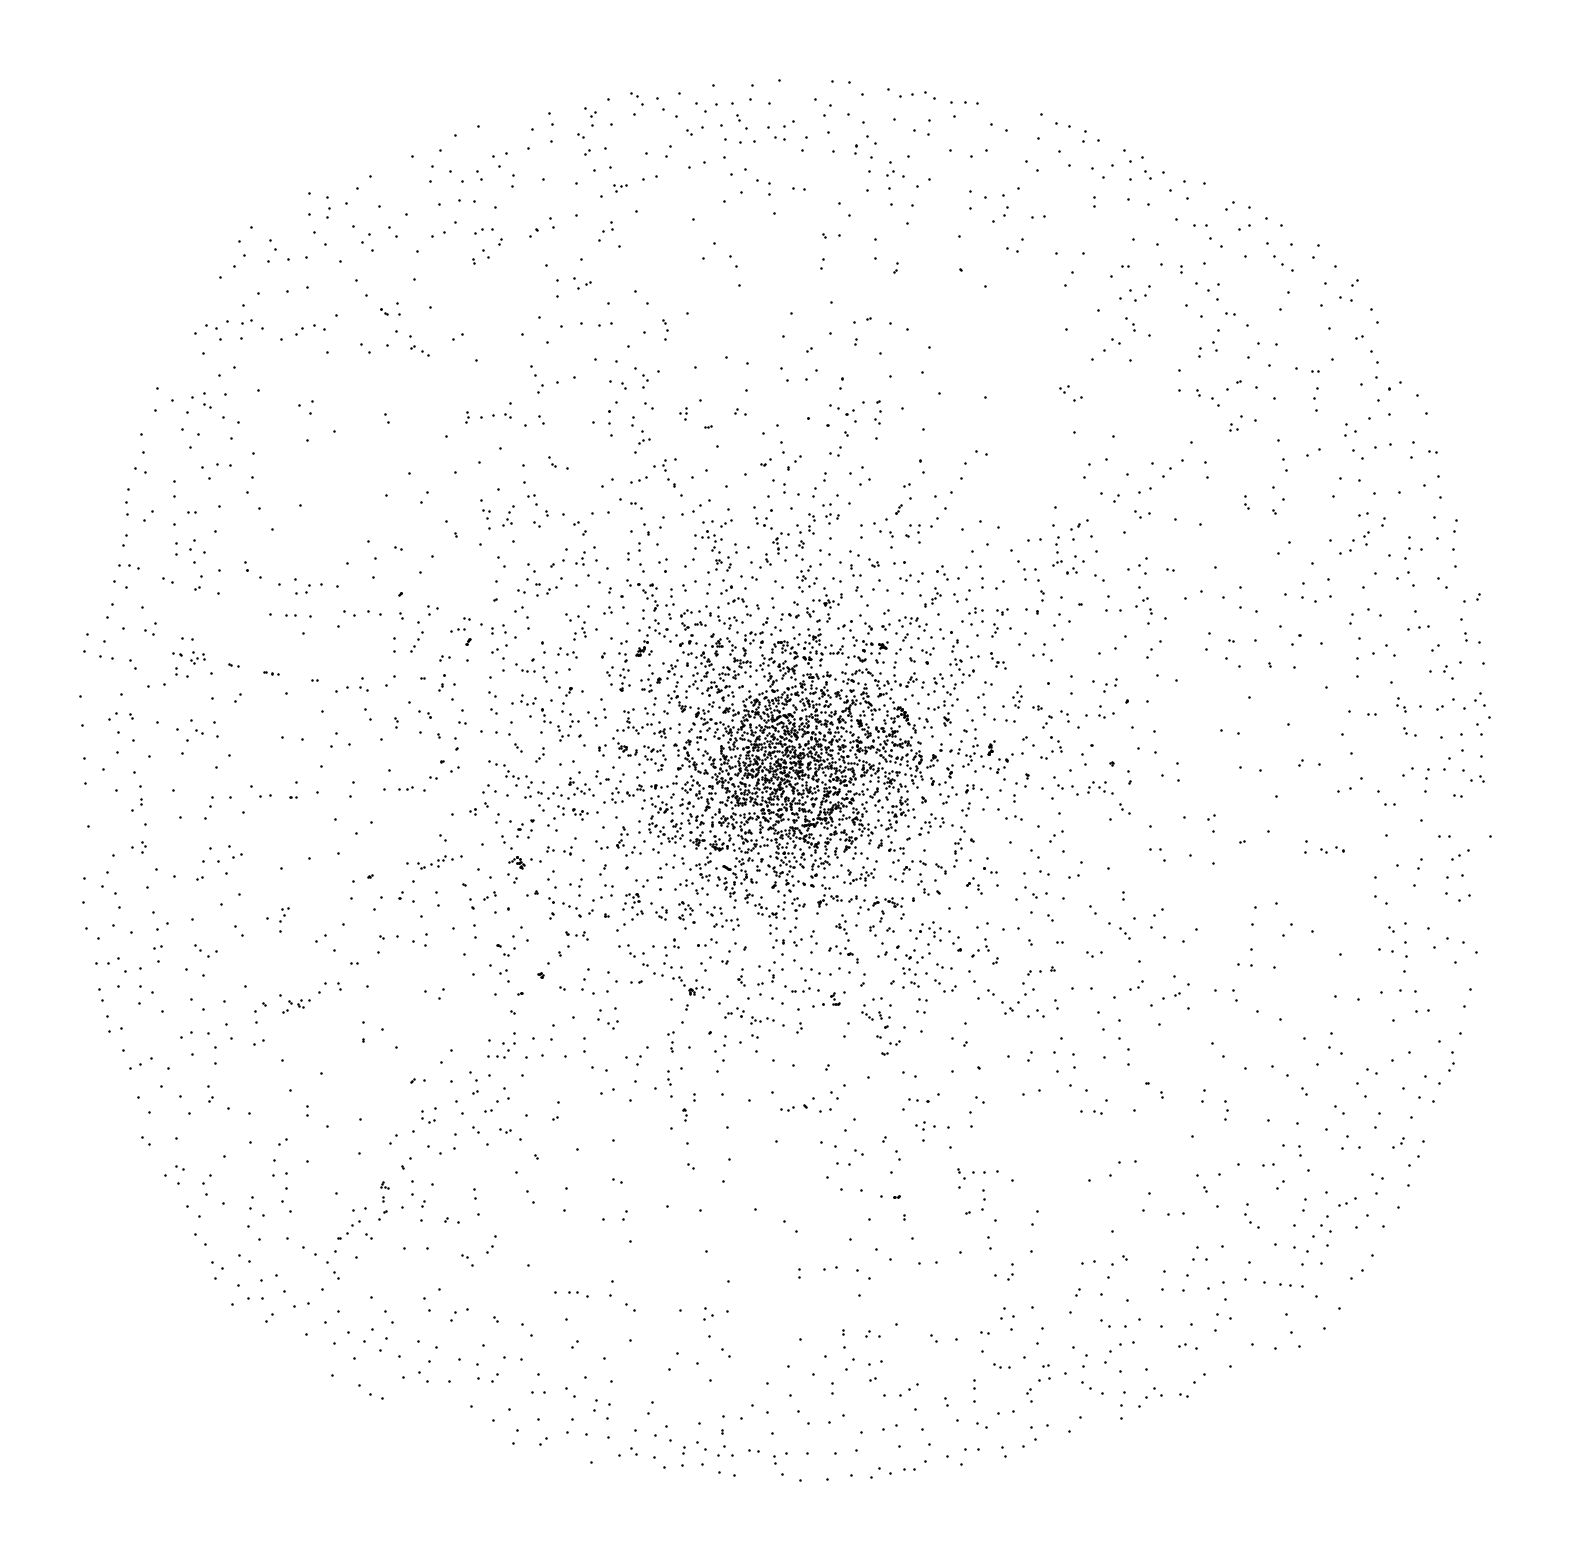

In [12]:

# Nobody wants to see your hairball, but let's plot it anyway
plt.figure(figsize=(20, 20))

# Plot only nodes (too many lines)
nx.draw_networkx_nodes(G_wiki, pos = pos, node_size = 1, node_color = "k")


# Exercise 2: Network characteristics

Network example: Protein interaction (PPI) in yeast. Nodes = Proteins, Edges = Recorded interactions in experiments

__Exercise__: Compare the PPI network with the Twitter network (ic2s2_netsci_3). What characteristics apply to both?


In [13]:
# Read PPI network
path_network = f"{path_data}/ppi_network_prediction.graphml"
G = nx.read_graphml(path_network, node_type=int)
len(G.nodes()), len(G.edges())

(964, 1205)

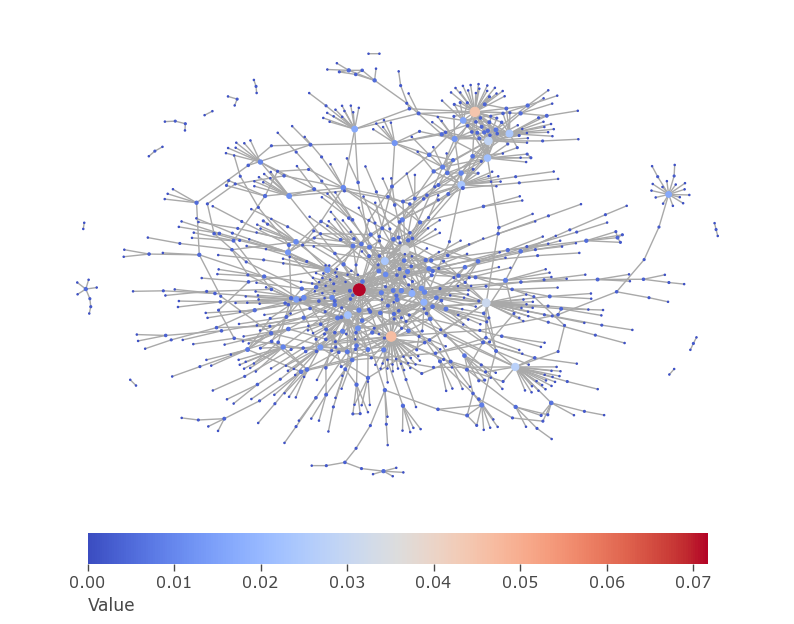

In [14]:
# igraph is faster. Here is how to convert to igraph
h = ig.Graph().from_networkx(G)
# create layout
layout = h.layout_fruchterman_reingold()
# create positions in the networx format (as a dictionary)
pos = dict(zip(G.nodes(), layout.coords))

# To use networkx, uncomment the line below
#pos = nx.spring_layout(G, seed = 1)

# Plot as before
fig, ax = plt.subplots(figsize=(10, 8))
#This function is defined in common_functions.py file. It adds automatic coloring and nicer defaults
plot_network(G, a0 = ax, pos = pos, with_labels=False) 

## 2.1 Connectedness

In [15]:
# Number of connected components
nx.components.number_connected_components(G)

108

In [16]:
# Size of the connected components (first 20)
[len(_) for _ in nx.connected_components(G)][:20]

[832, 1, 1, 1, 1, 1, 1, 1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [17]:
# Let's keep the largest component (be careful, don't do this in your data withuot a very good reason)
largest_cc = max(nx.connected_components(G), key=len)

# Create a subgraph of G consisting only of nodes in largest_cc
G = G.subgraph(largest_cc).copy()
len(G)

832

## 2.2 Small diameters

In [18]:
# Diameter
nx.diameter(G)

17

In [19]:
# Average shortest path
nx.average_shortest_path_length(G)

5.732010205498472

## 2.3 Density

In [20]:
nx.density(G)

0.003413403684161807

## 2.4 Transitivity and average clustering 

In [21]:
# Average at the network level (# triangles / possible number of triangles)
print(nx.transitivity(G))

# Average at the node level = Average(# triangles_i / possible triangles_i )
print(nx.average_clustering(G))

0.014834857249486844
0.04306986631731973


## 2.5 Assortativity and homophily

In [22]:
nx.assortativity.degree_assortativity_coefficient(G)

-0.16706848120532797

## 2.6 Heavy tails

Text(0, 0, 'Count (degree)')

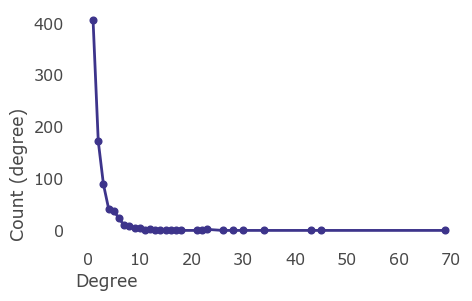

In [23]:
degree_list = dict(G.degree()).values()
from collections import Counter

# count the number of nodes with a specific degree, sort it
C = Counter(degree_list)
deg, cnt = zip(*sorted(C.items()))

# Plot
plt.plot(deg, cnt, "o-")
plt.xlabel("Degree")
plt.ylabel("Count (degree)")


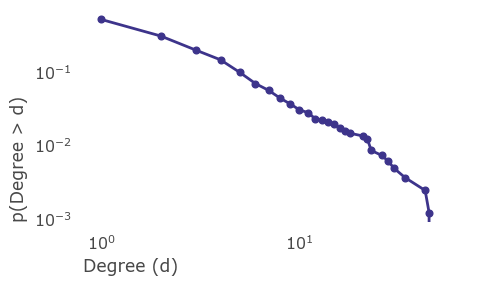

In [24]:
# Defined in common_functions.py
plot_cdf(degree_list, compl = True, xlabel = "Degree (d)", ylabel = "p(Degree > d)")


## 2.7 Robustness to failures / Fragility to targeted attacks

In [25]:
def attack_network(G, how="targeted", n_remove=200):
    """
    Removes nodes iteratively and keeps the (harmonic average of distance between all pairs of nodes)
    
    how = "targeted" targets the node with the highest degree
    """
    n_components = []

    G2 = G.copy()
    for i in range(n_remove):
        if how == "targeted":
            # Find the node with the highest degree
            node_to_remove = max(G2.degree(), key=lambda x: x[1])[0]

        else:
            # Random node
            node_to_remove = np.random.choice(G2.nodes(), 1)[0]

        # Remove node
        G2.remove_node(node_to_remove)
        # Number of nodes in giant component
        n_comp = max([len(_) for _ in nx.connected_components(G2)])
        n_components.append(100*n_comp/len(G2))
        
        
    return n_components

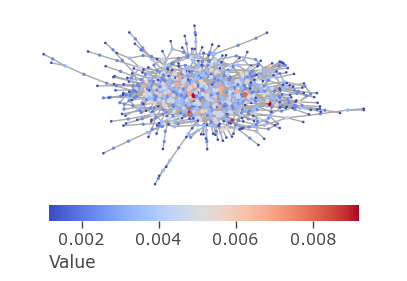

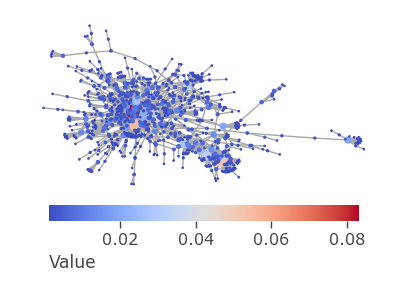

In [26]:
# Create an ER graph (random graph)
G_r = nx.random_graphs.gnm_random_graph(1000,len(G.edges()))
# Let's keep the largest component (be careful, don't do this in your data withuot a very good reason)
largest_cc = max(nx.connected_components(G_r), key=len)

# Create a subgraph of G consisting only of nodes in largest_cc
G_r = G_r.subgraph(largest_cc).copy()

# Plot network random
plot_network(G_r, with_labels=False)
plt.show()

# Plot network PPI
plot_network(G, with_labels=False)

In [27]:
n_remove = 200
n_comp_attack_t = attack_network(G, how="targeted", n_remove = n_remove)
n_comp_attack_r = attack_network(G, how="random", n_remove = n_remove)

ref_n_comp_attack_t = attack_network(G_r, how="targeted", n_remove = n_remove)
ref_n_comp_attack_r = attack_network(G_r, how="random", n_remove = n_remove)

(0.0, 100.0)

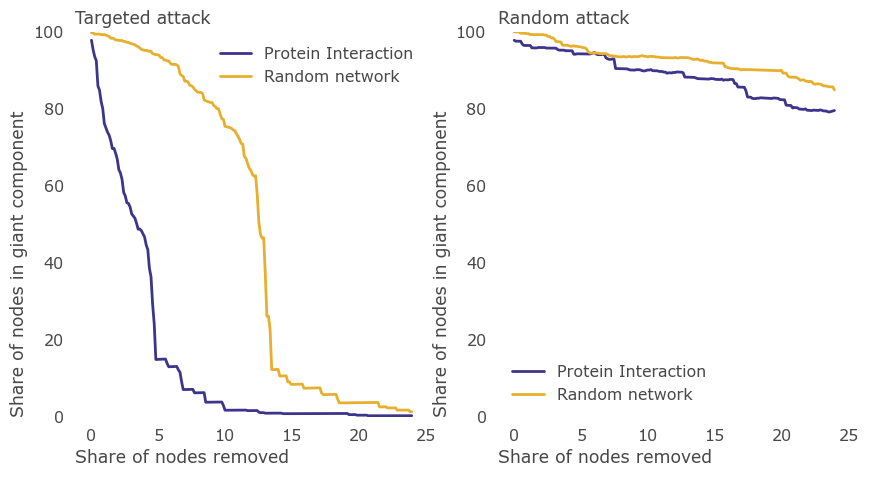

In [28]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(100*np.arange(n_remove)/len(G), n_comp_attack_t, label="Protein Interaction")
plt.plot(100*np.arange(n_remove)/len(G), ref_n_comp_attack_t, label="Random network")
plt.xlabel("Share of nodes removed")
plt.ylabel("Share of nodes in giant component")
plt.legend()
plt.title("Targeted attack")
plt.ylim(0,100)

plt.subplot(122)
plt.plot(100*np.arange(n_remove)/len(G), n_comp_attack_r, label="Protein Interaction")
plt.plot(100*np.arange(n_remove)/len(G), ref_n_comp_attack_r, label="Random network")
plt.xlabel("Share of nodes removed")
plt.ylabel("Share of nodes in giant component")
plt.legend()
plt.title("Random attack")
plt.ylim(0,100)

# Exercise 3: Distributions (i.e. looking at characteristics of the nodes)
- Degree
- Number of triangles
- Clustering (transitivity)
- Local assortativity (homophily)
- Path length

__Goal__: Understand how to calculate distributions in `networkx`, interpret differences in the degree distribution 

__Exercise__: In 3.7 compare the Wikipedia network (default example), the PPI network and the Twitter network (IC2S2)

In [29]:
# Read data on florentine marriage families in the XV century
G = nx.florentine_families_graph()
len(G)


15

In [30]:
# Use the following function to plot the CDF of the degree distributions
def plot_cdf(values, scale = "log", ax = None, cum = True, compl = False, marker = 'o-', xlabel = "Degree (d)", ylabel = "p(Degree < d)"):
    """
    Calculates and plot CDF
    """
    
    from collections import Counter

    # count the number of instance per each degree, sort it
    C = Counter(values)
    deg, cnt = zip(*sorted(C.items()))
    
    # calcualte the cumulative distribution, normalize to be a probability instead of a count
    if cum:
        cs = np.cumsum(cnt)/np.sum(cnt)
    else:
        cs = cnt/np.sum(cnt)
    
    if compl:
        cs = 1 - cs
        
    if ax is None:
        ax = plt.subplot()
    # plot
    ax.plot(deg, cs, marker)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.tight_layout()
    sns.despine(left=True, bottom=True)
    plt.xscale(scale)
    plt.yscale(scale)
    

## 3.1 Degree distribution

In [31]:
def plot_network_distribution(G, values, mult = 1000, with_labels = True):
    """
    Plots network (color and node size depends on values) and distributions
    """
    import matplotlib as mpl
    norm = mpl.colors.Normalize(vmin=min(values), vmax=max(values), clip=True)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


    f, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [2, 1, 1]}, figsize=(12,4))
    
    node_size = mult*np.array(list(values))
    if min(node_size) < 0:
        node_size -= min(node_size)
        node_size += 1
        
    nx.draw(G, pos = nx.spring_layout(G, seed = 1), with_labels = with_labels, node_size = node_size, edge_color = "gray", 
           node_color = [mapper.to_rgba(i) for i in values], ax = a0,)


    sns.histplot(values, ax = a1)
    
    
    plot_cdf(values, ax = a2, compl = True, xlabel = "Cent c", ylabel = "p(Cent > c)")

[1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 6]


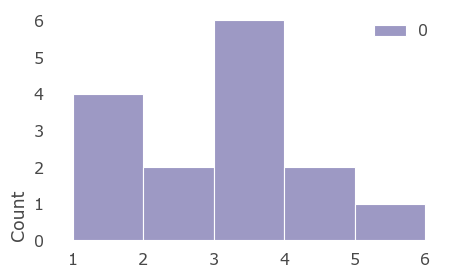

In [32]:
# Degree distribution
degree = G.degree() #also nx.degree(G)
degree_values = dict(degree).values()

# Plot using sns.histplot
sns.histplot(degree_values)
print(sorted(degree_values))

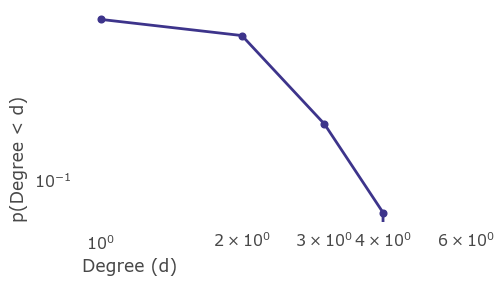

In [33]:
# Plot CDF in log-log scale
plot_cdf(degree_values, scale = "log", ax = None, cum = True, compl = True)

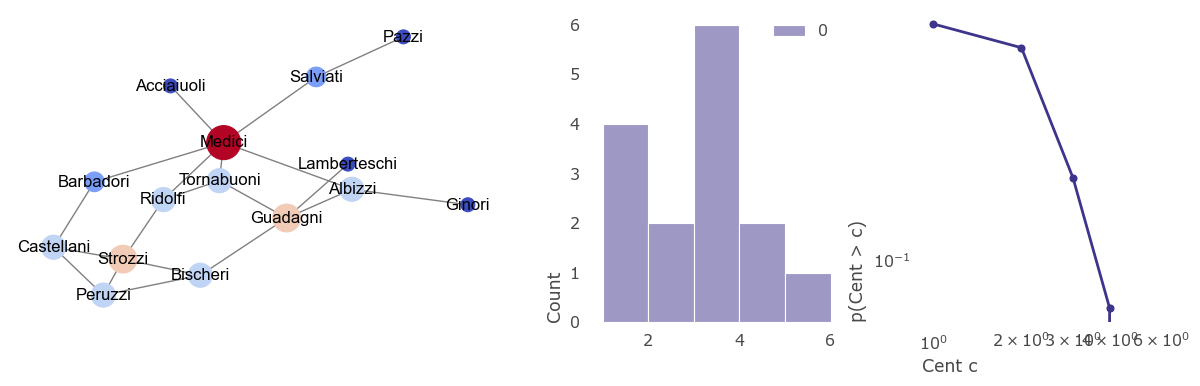

In [34]:
# change "mult" to change the size of the nodes 
plot_network_distribution(G, degree_values, mult = 100)

## 3.2 Distribution of number of triangles

[('Acciaiuoli', 0),
 ('Medici', 1),
 ('Castellani', 1),
 ('Peruzzi', 2),
 ('Strozzi', 2),
 ('Barbadori', 0),
 ('Ridolfi', 1),
 ('Tornabuoni', 1),
 ('Albizzi', 0),
 ('Salviati', 0),
 ('Pazzi', 0),
 ('Bischeri', 1),
 ('Guadagni', 0),
 ('Ginori', 0),
 ('Lamberteschi', 0)]

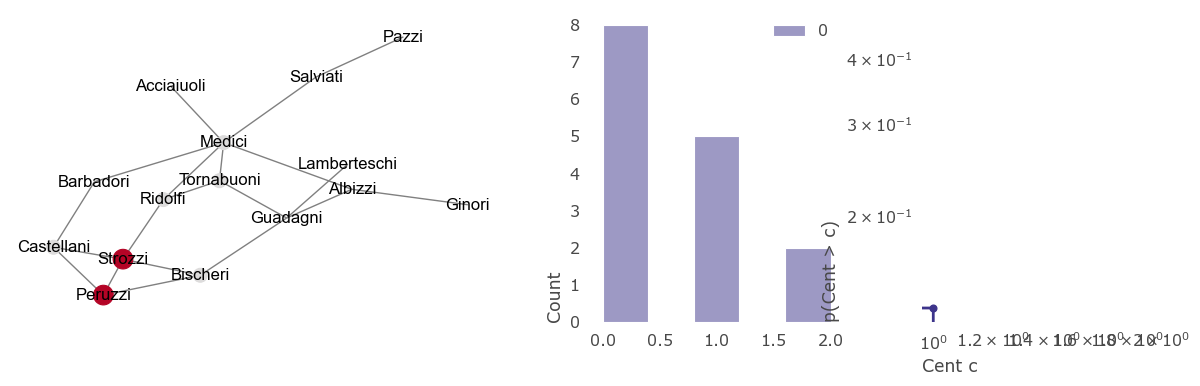

In [35]:
# Distribution of the number of triangles per node
n_triangs = nx.triangles(G).values() 
display(list(zip(G.nodes(), n_triangs))[:20])

plot_network_distribution(G, n_triangs, mult = 100)

## 3.3 Distribution of clustering

[('Acciaiuoli', 0),
 ('Medici', 0.06666666666666667),
 ('Castellani', 0.3333333333333333),
 ('Peruzzi', 0.6666666666666666),
 ('Strozzi', 0.3333333333333333),
 ('Barbadori', 0),
 ('Ridolfi', 0.3333333333333333),
 ('Tornabuoni', 0.3333333333333333),
 ('Albizzi', 0),
 ('Salviati', 0),
 ('Pazzi', 0),
 ('Bischeri', 0.3333333333333333),
 ('Guadagni', 0),
 ('Ginori', 0),
 ('Lamberteschi', 0)]

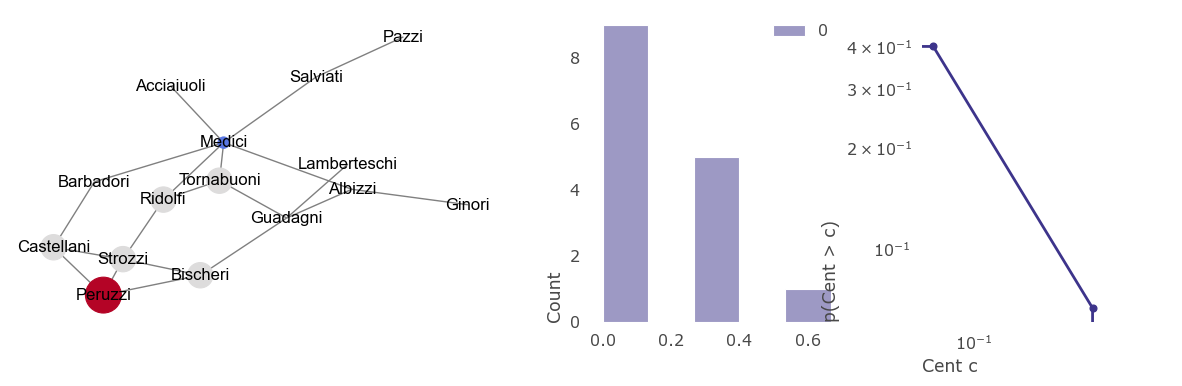

In [36]:
n_clus = nx.clustering(G).values()
display(list(zip(G.nodes(), n_clus))[:20])

plot_network_distribution(G, n_clus, mult = 1000)

### 3.4 Distribution of shortest paths

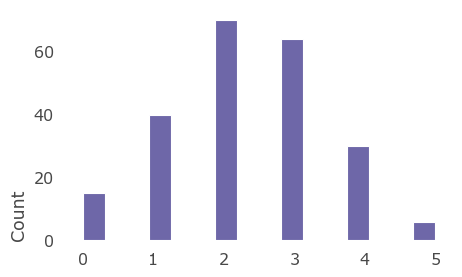

In [37]:
# Calculate all shortest paths (careful, this quickly becomes unfeasible)
path_lenghts = nx.shortest_path_length(G)

# Get results from a nested dictionary
path_lenghts = [list(_[1].values()) for _ in path_lenghts]
path_lenghts = [subitem for item in path_lenghts for subitem in item ]

# Plot using sns.histplot
sns.histplot(path_lenghts)
plt.show()

## 3.5 Distribution of local assortativity

[('Acciaiuoli', -0.6808969026392604),
 ('Medici', -0.021174869563784306),
 ('Castellani', 0.007141719383490342),
 ('Peruzzi', 0.012639185707593273),
 ('Strozzi', 0.017994443222937598),
 ('Barbadori', -0.08452005352503844),
 ('Ridolfi', 0.03000675226701813),
 ('Tornabuoni', 0.030636247828207466),
 ('Albizzi', 0.020951434083395542),
 ('Salviati', -0.05381721467845225),
 ('Pazzi', 0.13130884983721394),
 ('Bischeri', 0.016882042111539906),
 ('Guadagni', -0.004185357392913659),
 ('Ginori', -0.0636397008162419),
 ('Lamberteschi', -0.26094765764931316)]

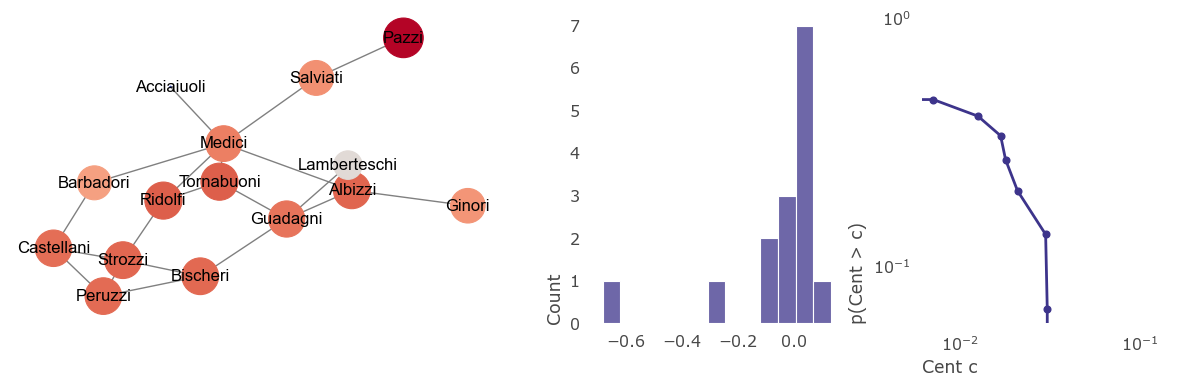

In [38]:
attribute = [k for v,k in G.degree()]
# Defined in common_functions (based on Peel et al 2018)
local_assort = calculate_local_assort(G, attribute)
display(list(zip(G.nodes(), local_assort))[:20])

plot_network_distribution(G, local_assort, mult = 1000)

## 3.6 Degree distribution if ~ normal distribution (used in the lectures)


In [39]:
# Don't change this
def plot_distributions(d, scale="log"):
    """
    Plot the PDF, CDF and CCDF.
    """
    plt.figure(figsize=(12,4))
    ax = plt.subplot(131)
    plot_cdf(d, cum = False, ax = ax,  xlabel = "Degree (d)", ylabel = "p(Degree)", marker = ".", scale=scale)
    if scale == "log":
        plt.plot([7E1, 5E2],[2.5E-3,1E-4],"--")
    plt.title("PDF")
    ax = plt.subplot(132)
    plot_cdf(d, cum = True, ax = ax,  xlabel = "Degree (d)", ylabel = "p(Degree < d)", marker="-", scale=scale)
    plt.title("CDF")
    ax = plt.subplot(133)
    plot_cdf(d, compl = True, ax = ax,  xlabel = "Degree (d)", ylabel = "p(Degree > d)", marker=".-", scale=scale)
    plt.title("CCDF")
    

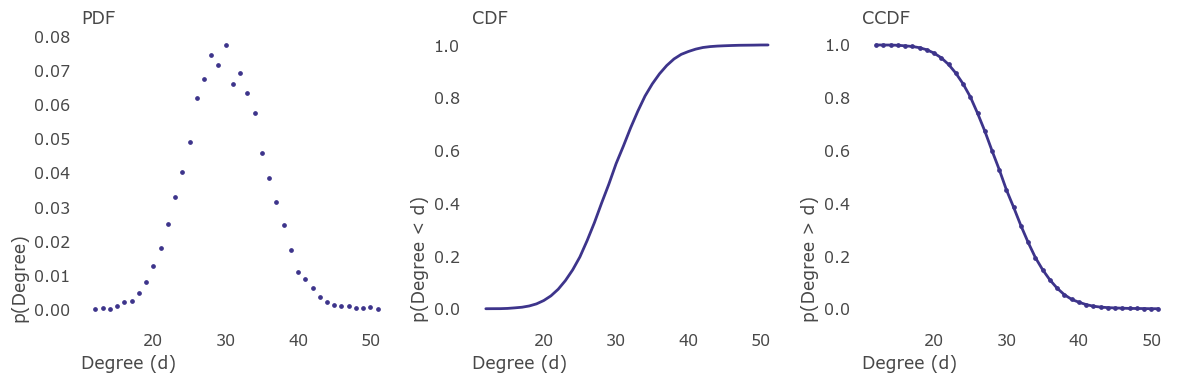

In [40]:
## Degree distribution (random normally distributed data)
## Try changing the scale to "log"
d = np.random.binomial(500, p = 30/500, size = 10000)
plot_distributions(d, scale="linear")


## 3.7 Degree distribution in the wiki network

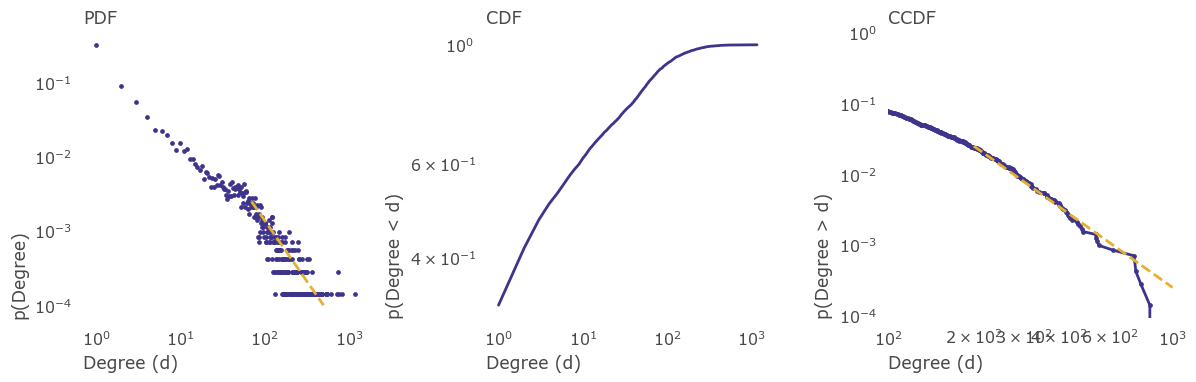

In [41]:
## Degree distribution (wiki network)
# Try the code using scale = "linear"
G_wiki = nx.read_edgelist(f"{path_data}/wiki-Vote.txt", create_using=nx.DiGraph())
d = [v for k,v in G_wiki.degree()]
plot_distributions(d, "log")
plt.xlim([100,1000])
plt.plot([2E2, 1E3], [2.5E-2,2.5E-4],"--")



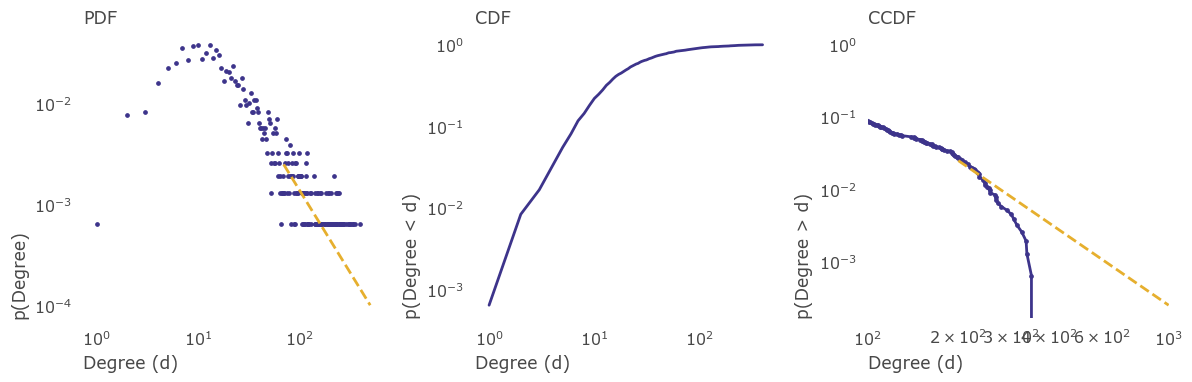

In [42]:
# Twitter data
df = pd.read_csv(f"{path_data}/ic2s2_netsci_3.tsv", sep="\t")
G_twitter = nx.from_pandas_edgelist(df)
G_twitter.remove_edges_from(nx.selfloop_edges(G_twitter)) #remove self-edges

d = [v for k,v in G_twitter.degree()]
plot_distributions(d, "log")
plt.xlim([100,1000])
plt.plot([2E2, 1E3], [2.5E-2,2.5E-4],"--")

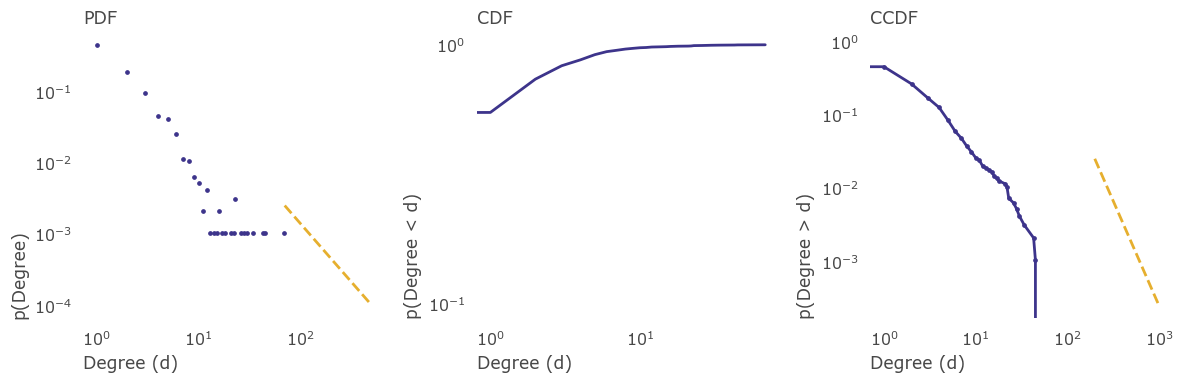

In [43]:
# PPI data
path_network = f"{path_data}/ppi_network_prediction.graphml"
G_ppi = nx.read_graphml(path_network, node_type=int)

d = [v for k,v in G_ppi.degree()]
plot_distributions(d, "log")

plt.plot([2E2, 1E3], [2.5E-2,2.5E-4],"--")

# Exercise 4A 
Is the network homophilic? (are people linked to people like them?)

Solution: Shuffle the node labels

__Goal__: Understand how a permutation test works (4A) and how reference models work (4B).

0.25333333333333335

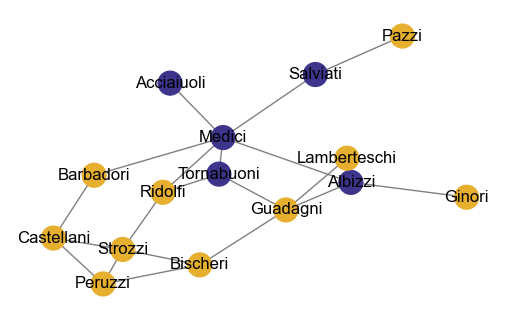

In [44]:
# Create labels

ns = ['Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi']
classes = ["m", "m", "o", "o", "o", "o", "o", "m", "m", "m", "o", "o", "o", "o", "o"]
nx.set_node_attributes(G, dict(zip(ns,classes)), "classes")

# Plot
nx.draw(G, pos = nx.spring_layout(G, seed = 1), with_labels = True, edge_color = "gray", 
       node_color = [palette[0] if c == "m" else palette[1] for c in classes])
    

# calculate assortativity coefficient
assort = nx.assortativity.attribute_assortativity_coefficient(G, "classes")
assort

0.06569999999999998

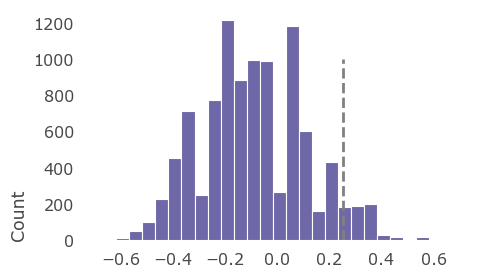

In [45]:
# Permutenode labels
G2 = G.copy()

# Randomize classes and calculate assortativity
iters = 10000
values = []
for i in range(iters):
    # shuffle the classes
    nx.set_node_attributes(G2, dict(zip(ns,np.random.permutation(classes))), "classes")
    # calculate assortativity and keep in a list
    values.append(nx.assortativity.attribute_assortativity_coefficient(G2, "classes"))
values = np.array(values)

# Plot results
sns.histplot(values, binwidth=0.05)
plt.plot([assort,assort],[0,iters/10], "--", color="gray")

# p-value (probability that we would observe a value equal or more extreme to the one observed given 
# that the null hyphotesis is true---i.e. the graph is the real graph and the links 
# are not correlated with the classes
1-len(values[values<assort])/len(values)

# Exercise 4B 
Is the network transitive? (are your friends also friends between them?)

Solution: Shuffle the edges or Grow the network


In [46]:
# Read data on florentine marriage families in the XV century
G = nx.florentine_families_graph()
print(nx.average_clustering(G))
print(nx.assortativity.degree_assortativity_coefficient(G))

0.16
-0.37483787289234866


#### We can compare our network to randomly generated data (this is useful to test hypothesis/get a baseline)

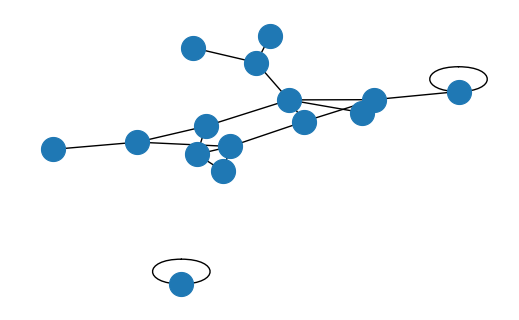

In [47]:
# Visualize random graphs (run several times)
degree_seq = [v for k,v in G.degree()]
G_r = nx.configuration_model(degree_seq)
G_r = nx.Graph(G_r)
nx.draw(G_r)

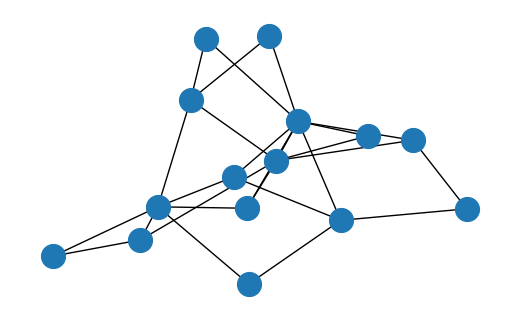

In [48]:
# Visualize random graphs (run several times)
n = len(G)
m = len(G.edges())
G_r = nx.random_graphs.barabasi_albert_graph(n,int(m/n)+1)
G_r = nx.Graph(G_r)
nx.draw(G_r)

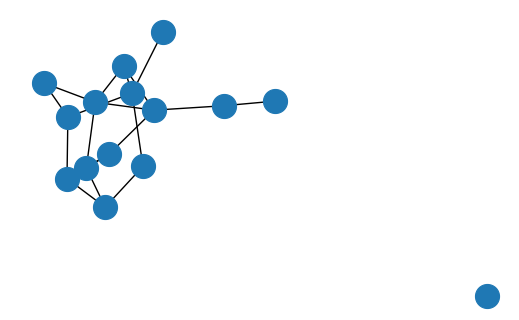

In [49]:
# Visualize random graphs (run several times)
n = len(G)
m = len(G.edges())
G_r = nx.random_graphs.gnm_random_graph(n,m)
G_r = nx.Graph(G_r)
nx.draw(G_r)

#### The function conf_int (defined in common_functions.py) creates 100 random graphs and calculates the desired metric

In [50]:
# Average local clustering coefficient
conf_int(G, nx.average_clustering, 100)
nx.average_clustering(G)
#same as np.mean(list(nx.clustering(G).values()))

Conf. model 0.037 - 0.249
ER graph 0.023 - 0.354
BA graph 0.045 - 0.377


0.16

In [51]:
# Transitivity (global clustering)
conf_int(G, nx.transitivity, 100)
nx.transitivity(G)

Conf. model 0.061 - 0.319
ER graph 0.064 - 0.306
BA graph 0.060 - 0.289


0.19148936170212766

In [52]:
# Assortativity
conf_int(G, nx.assortativity.degree_assortativity_coefficient, 100)
nx.assortativity.degree_assortativity_coefficient(G)


Conf. model -0.457 - 0.069
ER graph -0.403 - 0.230
BA graph -0.531 - -0.125


-0.37483787289234866

# Exercise 4B.2

Use igraph to read the network and calculate assortativity, and compare with random model (ER)

In [53]:
G_wiki = nx.read_edgelist(f"{path_data}/wiki-Vote.txt", create_using=nx.DiGraph())
# Read directed graph
print(len(G_wiki.nodes()))
print(len(G_wiki.edges()))

# Convert to igraph
h = ig.Graph.from_networkx(G_wiki)

# Look at how much faster it is (700 times slower in my computer)
%timeit h.assortativity_degree()
%timeit nx.assortativity.degree_assortativity_coefficient(G_wiki)

7115
103689
113 µs ± 164 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
73.8 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Compare with random model (ER)

In [54]:
# networkx
def conf_dens_nx(n, m):
    """Create random graph and calculate assortativity in networkx"""
    G_r = nx.random_graphs.gnm_random_graph(n,m)
    return nx.assortativity.degree_assortativity_coefficient(G_r)
def conf_dens_ig(n,m):
    """Create random graph and calculate assortativity in igraph"""
    h_r = ig.Graph.Erdos_Renyi(n=n,m=m)
    return h_r.assortativity_degree()

In [55]:
%%time
# Doing it in igraph 10 times
n, m = len(G_wiki), len(G_wiki.edges())
print(np.percentile([conf_dens_nx(n, m) for i in range(10)], [5,95]))

nx.assortativity.degree_assortativity_coefficient(G_wiki)

[-0.00501051  0.00233223]
CPU times: user 2.5 s, sys: 35.9 ms, total: 2.54 s
Wall time: 2.53 s


-0.08324455771686787

In [56]:
%%time
# Doing it in igraph 100 times
n, m = h.vcount(), h.ecount()
print(np.percentile([conf_dens_ig(n,m) for i in range(100)], [5,95]))

h.assortativity_degree()

[-0.00477069  0.00484799]
CPU times: user 1.19 s, sys: 31.8 ms, total: 1.23 s
Wall time: 1.23 s


-0.0832445577168681